In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# import data
df = pd.read_csv('Automobile_data.csv')

------------
# Clean the data

In [3]:
# Remove null values
df = df.replace('?', np.nan)
df = df.dropna()
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['price'] = pd.to_numeric(df['price'])

In [4]:
# Fix column names
df['avg_mpg'] = (df['city-mpg'] + df['highway-mpg']) / 2
df['curb_weight'] = df['curb-weight']
df['body_style'] = df['body-style']
df['fuel_type'] = df['fuel-type']
df['drive_wheels'] = df['drive-wheels']
df['wheel_base'] = df['wheel-base']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

----------
# Simple Linear Regression

Target variable: `price`
Feature variable: `avg_mpg`

In [6]:
# make model
slr_model = smf.ols('price ~ horsepower', data=df).fit()
print(slr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     214.5
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           3.59e-31
Time:                        13:48:23   Log-Likelihood:                -1536.6
No. Observations:                 159   AIC:                             3077.
Df Residuals:                     157   BIC:                             3083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2488.7317    998.777     -2.492      0.0

## Example plot

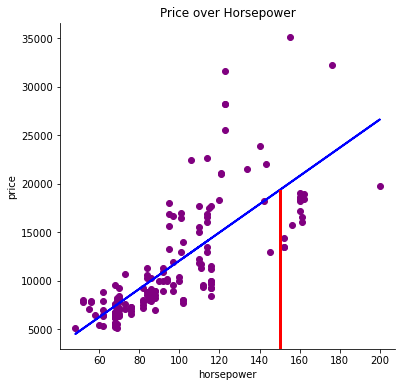

In [7]:
# plot slr model
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df['horsepower'], df['price'], color='purple')
ax.set_xlabel('horsepower')
ax.set_ylabel('price')
ax.set_title('Price over Horsepower')

# regression line
beta, y_inter = np.polyfit(df['horsepower'], df['price'], 1)
ax.plot(df['horsepower'], beta * df['horsepower'] + y_inter, c='blue', lw=2)

# sample calculation
ax.axvline(150, ymin=0, ymax=.485, lw=3, color='red')

#clean up plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Plot where beta_1 = 0

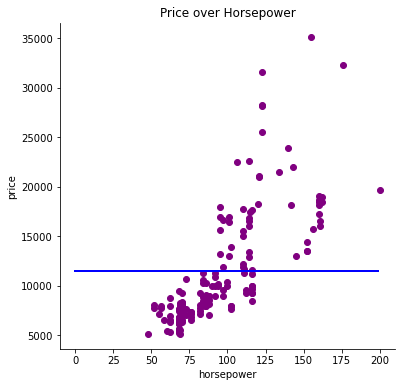

In [8]:
# plot slr model
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df['horsepower'], df['price'], color='purple')
ax.set_xlabel('horsepower')
ax.set_ylabel('price')
ax.set_title('Price over Horsepower')


# regression line
beta, y_inter = np.polyfit(df['horsepower'], df['price'], 1)
ax.plot([i for i in range(0,200)],[df['price'].mean() for i in range(0,200)], c='blue', lw=2)
#ax.set_yticks([y_inter, 0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
#ax.set_xticks([x for x in range(0, 200, 20)])

# sample calculation
#ax.axvline(150, ymin=0, ymax=.485, lw=3, color='red')

#clean up plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Plot where beta_1 != 0

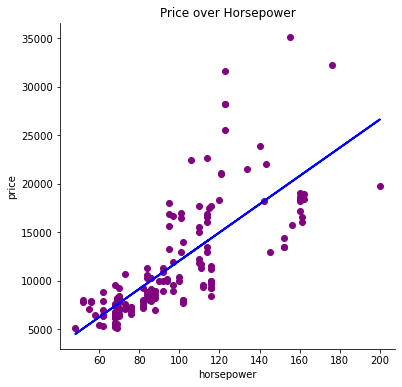

In [9]:
# plot slr model
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df['horsepower'], df['price'], color='purple')
ax.set_xlabel('horsepower')
ax.set_ylabel('price')
ax.set_title('Price over Horsepower')

# regression line
beta, y_inter = np.polyfit(df['horsepower'], df['price'], 1)
ax.plot(df['horsepower'], beta * df['horsepower'] + y_inter, c='blue', lw=2)

# sample calculation
#ax.axvline(150, ymin=0, ymax=.485, lw=3, color='red')

#clean up plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [10]:
# Find slope and parameters
b_0, b_1 = slr_model.params

In [11]:
print(f'price = {np.round(b_0, 2)} {np.round(b_1, 2)} * avg_mpg')

price = -2488.73 145.4 * avg_mpg


In [12]:
def estimate_price_from_horsepower(avg_mpg_new):
    return np.round(b_0 + b_1 * avg_mpg_new,2)

In [13]:
estimate_price_from_horsepower(150)

19321.01

----
# Multiple Linear Regression

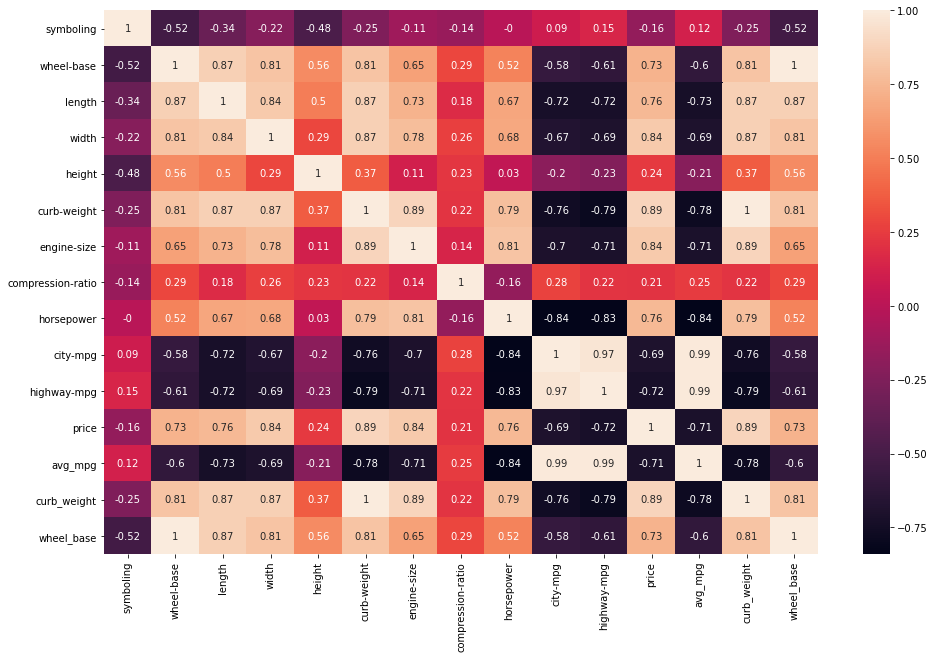

In [14]:
# Check correlation of numeric variables
import seaborn as sns
correlation_matrix = df.corr().round(2)
plt.figure(figsize = (16, 10))
sns.heatmap(data=correlation_matrix, annot=True)

plt.show()

Target: `price` Feature variables: `avg_mpg`, `wheel_base`, `fuel_type`

In [15]:
# Makde mlr model
mlr_model = smf.ols('price ~ horsepower + curb_weight', data=df).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     324.7
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.49e-56
Time:                        13:48:24   Log-Likelihood:                -1474.6
No. Observations:                 159   AIC:                             2955.
Df Residuals:                     156   BIC:                             2964.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.461e+04   1121.140    -13.030      

In [16]:
b_0, b_1, b_2 = mlr_model.params

In [17]:
b_0, b_1, b_2

(-14607.999732681192, 27.403982599696636, 9.518939874533013)

In [18]:
# example where horsepower = 150 and weight = 2500
b_0 + b_1 * 150 + b_2 * 2500

13299.947343605834